## Steps for Building the Model

1. Data Cleaning

1. Data Collection & Manipulation

1. Data Analysis

1. Data Pre-Processing

1. Splitting the data into Training data & Testing Data

1. Model Training

1. Model Evaluation

1. Testing the Model


In [1]:
# Importing the Dependencies/libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 1 Data-Cleaning

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./unclean_data.csv' , delimiter=',')  # specify your own


# Display the original DataFrame
print("Original DataFrame:")
print(df)


# Convert the 'AGE' column to numeric, replacing non-numeric values with NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')


# Task 1: Find the average age (excluding values greater than or equal to 100)
average_age = df.loc[df['age'] < 100, 'age'].mean()


# Display the average age
print("\nAverage Age (excluding values >= 100):", average_age)


# Replace values in the 'AGE' column with the calculated average
df.loc[df['age'] >= 100, 'age'] = average_age
df['age'] = df['age'].astype(int)




# Task 2: Find the most frequent gender
most_frequent_gender = df['sex'].mode()[0]


# Display the most frequent gender
print("\nMost Frequent Gender:", most_frequent_gender)


# Replace NaN values in the 'GENDER' column with the most frequent gender
df['sex'].fillna(most_frequent_gender, inplace=True)


# Display the DataFrame after cleaning
print("\nCleaned DataFrame:")
print(df)


# Update the CSV file with the cleaned DataFrame
df.to_csv('cleaned_data.csv', index=False)

Original DataFrame:
      age     sex    bmi  children smoker     region  charges
0      19  female  27.90         0    yes  southwest    16885
1     118    male  33.77         1     no  southeast     1726
2      28    male  33.00         3     no  southeast     4449
3      33    male  22.71         0     no  northwest    21984
4     312    male  28.88         0     no  northwest     3867
...   ...     ...    ...       ...    ...        ...      ...
1333   50    male  30.97         3     no  northwest    10601
1334   18  female  31.92         0     no  northeast     2206
1335   18     NaN  36.85         0     no  southeast     1630
1336  221  female  25.80         0     no  southwest     2008
1337   61  female  29.07         0    yes  northwest    29141

[1338 rows x 7 columns]

Average Age (excluding values >= 100): 39.206792452830186

Most Frequent Gender: male

Cleaned DataFrame:
      age     sex    bmi  children smoker     region  charges
0      19  female  27.90         0    yes 

# **Step2**

*   Data Collection and Manipulation



In [3]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('./cleaned_data.csv')

In [4]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16885
1,39,male,33.77,1,no,southeast,1726
2,28,male,33.00,3,no,southeast,4449
3,33,male,22.71,0,no,northwest,21984
4,39,male,28.88,0,no,northwest,3867


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_dataset.duplicated().sum()

1

In [9]:
insurance_dataset.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16885
1,39,male,33.77,1,no,southeast,1726
2,28,male,33.00,3,no,southeast,4449
3,33,male,22.71,0,no,northwest,21984
4,39,male,28.88,0,no,northwest,3867
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10601
1334,18,female,31.92,0,no,northeast,2206
1335,18,male,36.85,0,no,southeast,1630
1336,39,female,25.80,0,no,southwest,2008


In [10]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical Features from the table are:

Sex <br>
Smoker <br>
Region

# **Step3**

* Data Analysis/visualization Part

In [11]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.204783,30.664581,1.094918,13270.414798
std,13.958853,6.097922,1.205493,12110.012882
min,18.000000,15.960000,0.000000,1122.000000
25%,27.000000,26.297500,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9382.000000
75%,51.000000,34.695000,2.000000,16640.000000
max,64.000000,53.130000,5.000000,63770.000000


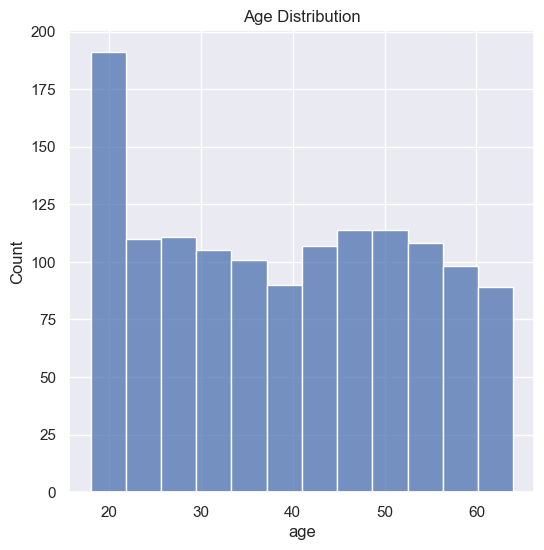

In [12]:
sns.set_theme()
plt.figure(figsize=(6,6))
sns.histplot(x='age', data=insurance_dataset)
plt.title('Age Distribution')
plt.show()

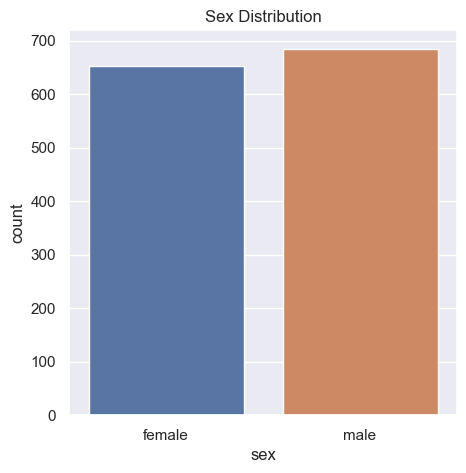

In [13]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

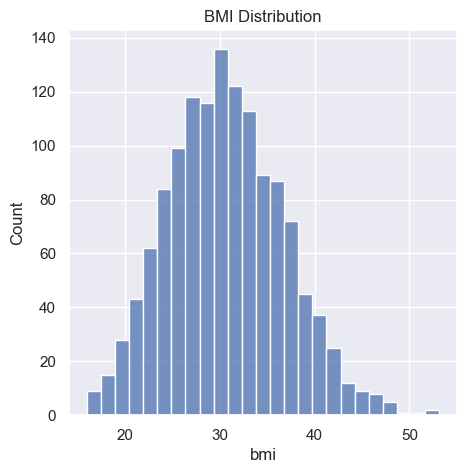

In [14]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

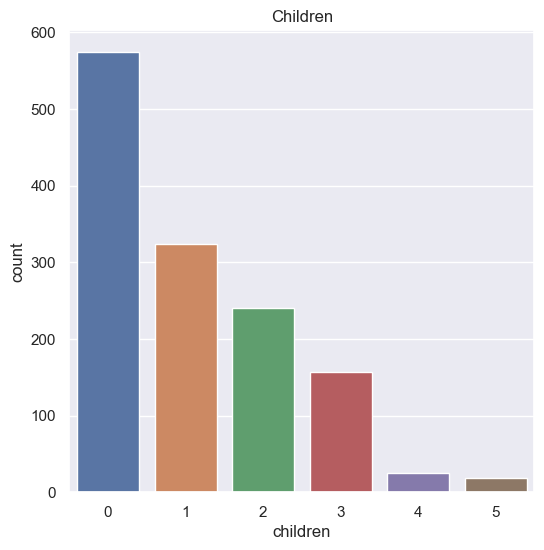

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

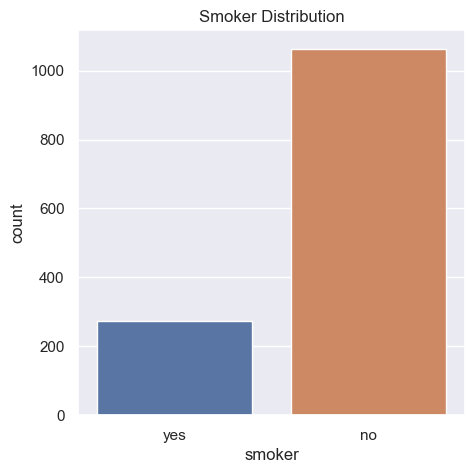

In [16]:
# smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

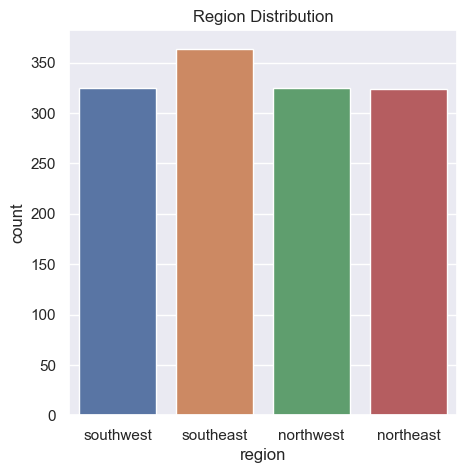

In [17]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

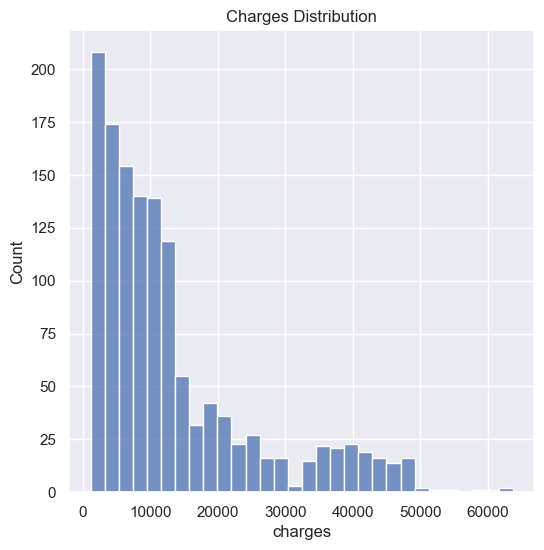

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# **step4**

* Data Pre-Processing

In [19]:
# Encoding the categorical features to Numeric value

# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [20]:
# checking the dataset
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10601
1334,18,1,31.92,0,1,2,2206
1335,18,0,36.85,0,1,0,1630
1336,39,1,25.80,0,1,1,2008
1337,61,1,29.07,0,0,3,29141


In [21]:
# Splitting the Features and Target

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print("Features")
print(X)
print()
print("Labels")
print(Y)

Features
      age  sex    bmi  children  smoker  region
0      19    1  27.90         0       0       1
1      39    0  33.77         1       1       0
2      28    0  33.00         3       1       0
3      33    0  22.71         0       1       3
4      39    0  28.88         0       1       3
...   ...  ...    ...       ...     ...     ...
1333   50    0  30.97         3       1       3
1334   18    1  31.92         0       1       2
1335   18    0  36.85         0       1       0
1336   39    1  25.80         0       1       1
1337   61    1  29.07         0       0       3

[1338 rows x 6 columns]

Labels
0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1333    10601
1334     2206
1335     1630
1336     2008
1337    29141
Name: charges, Length: 1338, dtype: int64


# **Step5**

* Splitting the data into Training data & Testing Data


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# **Step6**

* Model Training

## Linear Regression Algorithm

In [23]:
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

# **Step7**

Model Evaluation

In [24]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7507813533530451


In [25]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7390432379423071


# **step 8**

Testing The Predictive System

In [33]:
input_data = (38,0,40.57,1,1,2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is $', "{:.2f}".format(prediction[0]) )

The insurance cost is $ 11416.65


C:\Users\shivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
